Kushal Kothari: Practicing Neural Networks with the Fashion-MNIST Dataset

**Seeding for reproducibility**

In [30]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [31]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Data Curation**

In [32]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Data Processing**

In [33]:
type(train_images)

numpy.ndarray

In [34]:
type(train_labels)

numpy.ndarray

In [35]:
print(len(train_images))

60000


In [36]:
print(len(train_labels))

60000


In [37]:
print(len(test_images))

10000


In [38]:
print(train_images[0].shape)

(28, 28)


In [39]:
print(type(train_images[0]))

<class 'numpy.ndarray'>


In [40]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

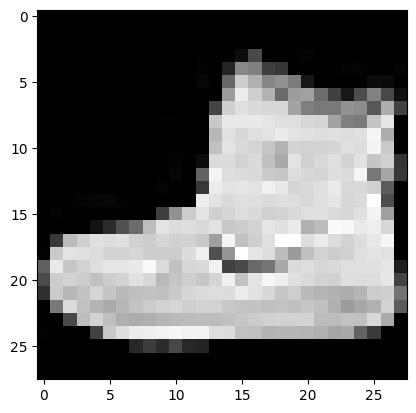

In [41]:
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [42]:
print(train_labels[0])

9


**class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']**

In [43]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [44]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [45]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [46]:
train_images.shape

(60000, 28, 28, 1)

In [47]:
test_images.shape

(10000, 28, 28, 1)

**Convolutional Neural Network**

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model Training**

In [50]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7486 - loss: 0.6952 - val_accuracy: 0.8699 - val_loss: 0.3620
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8781 - loss: 0.3374 - val_accuracy: 0.8831 - val_loss: 0.3244
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8961 - loss: 0.2842 - val_accuracy: 0.8919 - val_loss: 0.2981
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9092 - loss: 0.2484 - val_accuracy: 0.8988 - val_loss: 0.2813
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9191 - loss: 0.2202 - val_accuracy: 0.8997 - val_loss: 0.2822


**Model Evaluation**

In [51]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8997 - loss: 0.2822

Test accuracy: 0.8996999859809875


Confusion matrix:
 [[886   3  18  19   8   0  56   0  10   0]
 [  3 986   1   8   1   0   0   0   1   0]
 [ 19   0 858   8  72   0  42   0   1   0]
 [ 11  23  10 894  39   0  18   0   5   0]
 [  0   0  38  19 911   0  32   0   0   0]
 [  0   2   0   2   0 932   0  29  23  12]
 [147   4  94  28 100   0 618   0   9   0]
 [  0   0   0   0   0   5   0 973   2  20]
 [  5   1   4   4   4   1   4   1 976   0]
 [  1   0   0   0   0   2   0  33   1 963]]


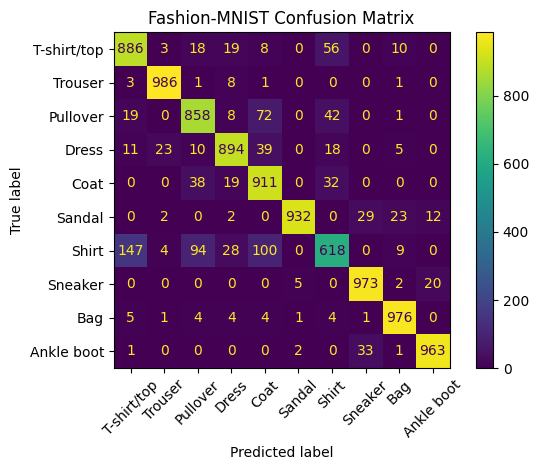


Classification report:
               precision    recall  f1-score   support

 T-shirt/top       0.83      0.89      0.86      1000
     Trouser       0.97      0.99      0.98      1000
    Pullover       0.84      0.86      0.85      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.80      0.91      0.85      1000
      Sandal       0.99      0.93      0.96      1000
       Shirt       0.80      0.62      0.70      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.95      0.98      0.96      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



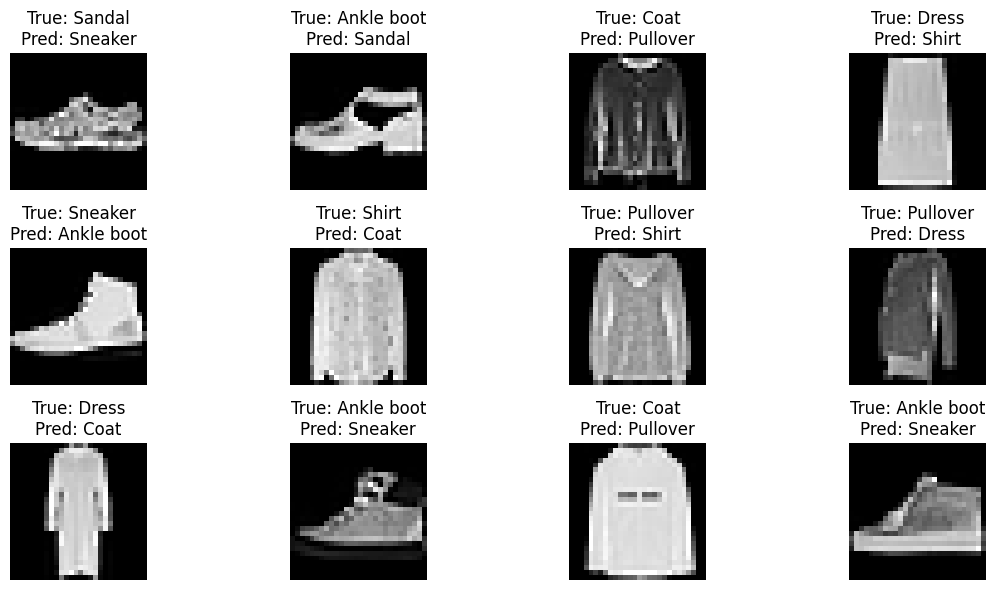

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

if 'model' not in globals() or model is None:
    if os.path.exists("fashion_mnist_best.keras"):
        model = tf.keras.models.load_model("fashion_mnist_best.keras")
        print("Loaded model from fashion_mnist_best.keras")
    elif os.path.exists("trained_fashion_mnist_model.h5"):
        model = tf.keras.models.load_model("trained_fashion_mnist_model.h5")
        print("Loaded model from trained_fashion_mnist_model.h5")
    else:
        raise RuntimeError("No trained model found. Re-run training, then save the model.")

# 1) Predict on test set (NumPy arrays path)
logits = model.predict(test_images, batch_size=256, verbose=0)   # logits OK; argmax same as softmax
y_pred = np.argmax(logits, axis=1)
y_true = test_labels

# 2) Confusion matrix (pretty)
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
          'Sandal','Shirt','Sneaker','Bag','Ankle boot']
cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)

disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot(xticks_rotation=45, values_format='d')
plt.title("Fashion-MNIST Confusion Matrix")
plt.tight_layout()
plt.show()

# 3) Classification report
print("\nClassification report:\n",
      classification_report(y_true, y_pred, target_names=labels, zero_division=0))

# 4) (Optional) Show a few misclassified images
wrong_idx = np.where(y_pred != y_true)[0][:12]
if len(wrong_idx) > 0:
    plt.figure(figsize=(12,6))
    for i, idx in enumerate(wrong_idx):
        plt.subplot(3,4,i+1)
        plt.imshow(test_images[idx].squeeze(), cmap='gray')
        plt.title(f"True: {labels[y_true[idx]]}\nPred: {labels[y_pred[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No misclassifications in the first 12 examined samples.")




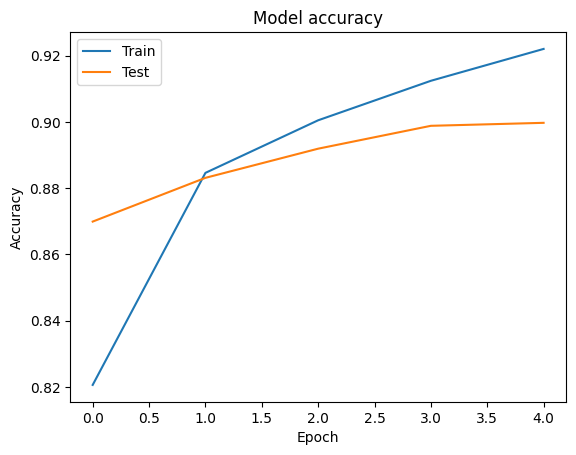

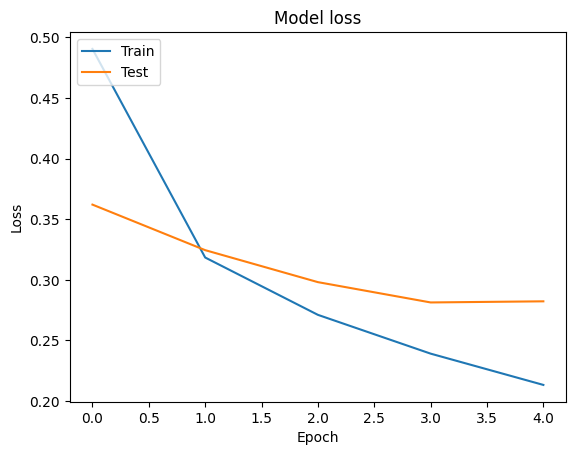

In [53]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [56]:
model.save('trained_fashion_mnist_model.h5')